# Cuisine Comparison of College Cities
by Mary Ann Peterman, April 2020


### 1. Introduction

#### 1.1.	Summary
In this project we will examine cuisine and restaurant styles in American college towns. Cities with major universities also have other colleges. This data analysis seeks to determine if college town restaurants share popularity in dining types. Answers are essential for a successful new restaurant or food truck enterprise in these communities.  Restaurants, in all towns across the melting pot of America, represent a wide variety of cuisines. Dining and fun eats are a draw to college towns in addition to other activities and venues.  What can we learn from them?
#### 1.2.	Business Problem
Choice of cuisine is an initial step in restaurant design and planning.  Marketers and developers in these areas would benefit from this analysis. Both locations are expected to have a dominance of typical American fare. What other cuisines is a do similar restaurant visitors share? What kind of restaurant would be popular in a college town?  Are there cuisine trends?  What types of restaurants are highly rated? From this inquiry, a new restaurant model could be chosen or assessment to move ahead. 
#### 1.3.	City Selection 
Initial research was made with city-data.com available data on two particular cities; South Bend, Indiana and Tallahassee, Florida are comparable midsized college towns. South Bend, Indiana was chosen for having the University of Notre Dame located just to the north in unincorporated Notre Dame.  Tallahassee is home to Florida State University which is just to the west.  Both colleges are adjacent and close to active downtowns. Preliminary examinations show that metro populations of both are approximately 320,000 and demographics are similar.  Both metro areas include more than 3 other traditional colleges. Both cities have very similar outdoor and cultural venues and cost of living.  Also, both have international airports and proximity to interstate traffic.  


### 2.	Data
#### 2.1.	Data Sources
Generational age data for each city was taken from the U.S. Census Bureau here.  
Source Tables: U.S. Census Bureau, 2013-2017 American Community Survey 5-Year Estimates. (Note: The city specific census tables used are no longer available due to new census reorganization of the website on March 30, 2020.)  Age source data was segmented into 5 year incremented groups. Children under 18 were excluded from this study.  Metropolitan populations were not studied, only city limits
Github was used for Capstone project data repository. 
Geodata locations of universities and cities called from Geopy Open Streets

Foursquare and Zomato APIs   
Foursquare returned; restaurant name, category, lat, longs. Foursquare and Zomato APIs returned 178 restaurants within 8,000 meters of each downtown. Category is a restaurant type differentiating from Zomato’s cuisine information only.
 Zomato returned; venue, latitude, longitude, ratings and cuisines. Ratings are a normalized distribution 5 point scale. Restaurants that are not rated are excluded from the subject data. Cuisines list out each cuisine served at the restaurant venue. 

#### 2.2 Libraries and Modules 

In [669]:
# Import Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#for data vizualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
#for ML Cluster
from sklearn.cluster import KMeans
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
#For city venue maps
!pip install folium
import folium as folium
# For tranforming JSON file, from API calls,into a pandas dataframe
import json
from pandas.io.json import json_normalize 
print('Libraries imported')

Libraries imported


In [39]:
age_sbn = pd.read_csv("https://raw.githubusercontent.com/MPeterman1/Coursera_Capstone/master/ACS_2017_SouthBend-NotreDame.csv")
#Table shows population counts
print(age_sbn.head())
# Columns used in both city's age tables:
cols=['Millenials','GenX','Boomers (GenZ)', 'Silent Gen']
# South Bend population is 81,340
Total=age_sbn.sum(axis=1)
print('Total population is', Total)
# Get percentage of each group
age_sbn = age_sbn[cols].div(81340).multiply(100).round(2)
age_sbn.insert(0,"City", ['South Bend'], True)
age_sbn

         City  Millenials   GenX  Boomers (GenZ)  Silent Gen
0  South Bend       38969  17879           15808        8684
Total population is 0    81340
dtype: int64


,City,Millenials,GenX,Boomers (GenZ),Silent Gen
0,South Bend,47.91,21.98,19.43,10.68


In [40]:
age_tlh = pd.read_csv("https://raw.githubusercontent.com/MPeterman1/Coursera_Capstone/master/ACS_2017_Tallahassee.csv")
#Table shows population counts
print(age_tlh.head())
# Tallahassee population 18 and over is 92,019
Total=age_tlh.sum(axis=1)
print('Total population is', Total)
# Get percentage of each group 
age_tlh[cols] = age_tlh[cols].div(92019).multiply(100).round(2)
age_tlh

          City  Millenials   GenX  Boomers (GenZ)  Silent Gen
0  Tallahassee       32498  24742           28585        6194
Total population is 0    92019
dtype: int64


,City,Millenials,GenX,Boomers (GenZ),Silent Gen
0,Tallahassee,35.32,26.89,31.06,6.73


In [60]:
# Put both city tables together
frames = [age_tlh, age_sbn]
table = pd.concat(frames, ignore_index=True)
print(table)
table.columns = ['City','Millenials (%)','GenX (%)','Boomers (GenZ %)','Silent Gen (%)']
table.index = ['Tallahassee','South Bend']
table = table.drop('City', 1)
table.head()

          City  Millenials   GenX  Boomers (GenZ)  Silent Gen
0  Tallahassee       35.32  26.89           31.06        6.73
1   South Bend       47.91  21.98           19.43       10.68


,Millenials (%),GenX (%),Boomers (GenZ %),Silent Gen (%)
Tallahassee,35.32,26.89,31.06,6.73
South Bend,47.91,21.98,19.43,10.68


#### Generation Group Distribution Visualization

In [61]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


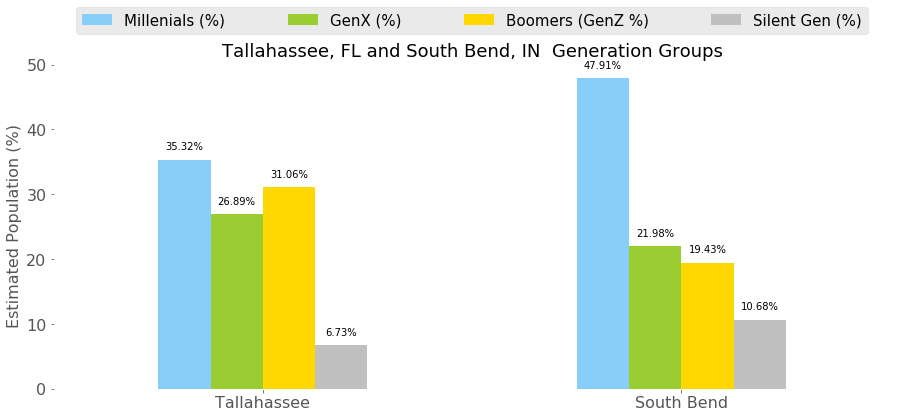

<Figure size 432x288 with 0 Axes>

In [70]:
bar_colors=['lightskyblue','yellowgreen','gold', 'silver']
table.plot(kind='bar',
                 figsize=(15, 6),
                 fontsize=16,
                 width=0.5,
                 color=bar_colors
                )
ax = plt.gca()
ax.set_title('Tallahassee, FL and South Bend, IN  Generation Groups', fontsize=18)
ax.patch.set_facecolor('white')
ax.set_ylabel('Estimated Population (%)', fontsize=16)
ax.set_xlabel('', fontsize=18)
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
fig = plt.figure()
fig.patch.set_facecolor('white')
rects = ax.patches
ax.legend(ncol=len(table.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), 
          borderaxespad=1.5, mode="expand", fontsize=15)
def add_value_labels(ax, spacing=8):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Final touches
add_value_labels(ax)
plt.show()

#### B.3 - Foursquare and Zomato API Data Handling
##### Obtain geospatial coordinates of cities


In [431]:
# convert a location into latitude and longitude values (OpenStreetMaps)
!pip install geopy
from geopy.geocoders import Nominatim
(print(' **Geocoder Loaded**'))
# 
address = 'Tallahassee, Florida'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
tlh_latitude = location.latitude
tlh_longitude = location.longitude

address = 'Florida State University, Tallahassee, Florida'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
fsu_latitude = location.latitude
fsu_longitude = location.longitude

print('The geographical coordinates of Tallahassee are {}, {}.'.format(tlh_latitude,tlh_longitude))
print('   and FSU are {}, {}.'.format(fsu_latitude,fsu_longitude))

address = 'South Bend, Indiana'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
sbn_latitude = location.latitude
sbn_longitude = location.longitude

address = 'Notre Dame, Indiana'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
nd_latitude = location.latitude
nd_longitude = location.longitude

print('The geographical coordinates of South Bend are {}, {}.'.format(sbn_latitude,sbn_longitude))
print('   and Notre Dame are {}, {}.'.format(nd_latitude,nd_longitude))

 **Geocoder Loaded**
The geographical coordinates of Tallahassee are 30.4380832, -84.2809332.
   and FSU are 30.44235995, -84.29747867166262.
The geographical coordinates of South Bend are 41.6833813, -86.2500066.
   and Notre Dame are 41.704567749999995, -86.23822026017265.


##### Get Tallahassee Venue information from Foursquare API

In [434]:
from pandas import json_normalize
import requests

In [435]:
CLIENT_ID = 'UWPDMQB53XI2UTNLU0AVC2T15ZK4TKTOBOLJUXTYEFL52AP4' # Foursquare ID
CLIENT_SECRET = 'FFEI040T5TOKJUYC3WM34DOU24LFI4HPNU1NAXRMTXSYZWBQ' #Foursquare Secret
VERSION = '20200115'
CATEGORY = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues
LIMIT = 100 #number of venues searched
RADIUS = 8500
offset = 0

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

total_venues = 0
tlh_foursq_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])
while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}'
           '&ll={},{}&radius={}&categoryId={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                CLIENT_SECRET, 
                                                                VERSION, 
                                                                tlh_latitude, 
                                                                tlh_longitude,
                                                                RADIUS,
                                                                CATEGORY, 
                                                                LIMIT,
                                                                offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]
      # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)
    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    tlh_foursq_venues = pd.concat([tlh_foursq_venues, venues], axis = 0, sort = False)
  
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

tlh_foursq_venues = tlh_foursq_venues.reset_index(drop = True)
print("\nTotal {} venues found".format(total_venues))
tlh_foursq_venues.to_csv("tlh_foursquare_venues.csv")
tlh_foursq_venues.head()


Total 177 venues found


,name,categories,lat,lng
0,Shula's 347 Grill,Steakhouse,30.446116,-84.280374
1,Voodoo Dog,Hot Dog Joint,30.435185,-84.288265
2,Soul Vegetarian,Vegetarian / Vegan Restaurant,30.432173,-84.281646
3,Catalina Cafe - Garages at Gaines,Café,30.435391,-84.290579
4,Olean's Cafe,Café,30.427069,-84.281838


##### Get rating and cuisine information for Tallahassee venues from Zomato
Foursquare's ratings for venues are only available for premium calls. (However, it is has less errors in venue names than Zomato.) My goal is to obtain a thorough list of restaurant types and ratings.
A more advantageous solution is using Zomato as a data source which gives rating with no added cost. In order to match venues between the two acquired lists and for mapping, latitude and longitude is requested. 

In [297]:
# ZOMATO Developer USER_ID = '2c97e8795dc550f5d96fa8b9b8f43c25' 
headers = {'user-key': '2c97e8795dc550f5d96fa8b9b8f43c25'}
venues_information = []
radius = 8500

for index,row in tlh_foursq_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}').format(row['name'], row['lat'], row['lng']) 
    result = requests.get(url, headers = headers).json()
    result
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['cuisines'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(5))
    
tlh_zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'rating','cuisines'])
tlh_zomato_venues.to_csv("tlh_zomato_venues.csv")
tlh_zomato_venues.head()  

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

,venue,latitude,longitude,rating,cuisines
0,Shula's 347 Grill,30.4460530000,-84.2805150000,3.8,"American, Seafood, Steak"
1,Voodoo Dog,30.4353660000,-84.2882860000,4.5,"American, Burger"
2,Soul Vegetarian Restaurant & Catering,30.4322550000,-84.2817860000,4.0,"Southern, Vegetarian"
3,Gaines Street Pies,30.4351510000,-84.2906620000,4.1,"Italian, Pizza"
4,Uptown Cafe,30.4550000000,-84.2634000000,3.9,"Breakfast, Sandwich, Vegetarian"


#### Combine source dataframes and clean up  Tallahassee!

In [424]:
tlh_venues = pd.concat([tlh_foursq_venues, tlh_zomato_venues], axis = 1)
#check combination
#tlh_venues
#correction is needed for sorting came in as an object
tlh_venues["rating"] = pd.to_numeric(tlh_venues["rating"])
#Remove data without a rating & cuisines not listed
tlh_venues = tlh_venues[tlh_venues['rating'] != 0.0]
tlh_venues = tlh_venues[tlh_venues['cuisines'] != ""]
#tlh_venues.drop row without rating or cuisine data
#Remove less accurate Zomato data
tlh_venues=tlh_venues.drop(columns= ['venue', 'latitude', 'longitude'])
#sort more useful order
tlh_venues = tlh_venues.sort_values(by=['cuisines'])
print("Total now available for more cleaning: {}".format(tlh_venues.shape[0]))
tlh_venues.head()

Total now available for more cleaning: 171


,name,categories,lat,lng,rating,cuisines
77,Cracker Barrel Old Country Store,American Restaurant,30.480547,-84.306500,3.7,American
58,Mission BBQ,Restaurant,30.440961,-84.262216,3.6,"American, BBQ, Southern"
76,Sonny's BBQ,BBQ Joint,30.430435,-84.225974,3.6,"American, BBQ, Southern"
119,Sonny's BBQ,BBQ Joint,30.505826,-84.252380,3.6,"American, BBQ, Southern"
125,Texas Roadhouse,Steakhouse,30.494835,-84.244719,3.6,"American, BBQ, Steak"


In [671]:
tlh_map = folium.Map(location=[tlh_latitude, tlh_longitude], zoom_start=12)
for venue, lat, long in zip(tlh_venues['name'],
                                tlh_venues['lat'], tlh_venues['lng']):
# add a yellow circle marker to represent the City Center
    folium.CircleMarker(
        [tlh_latitude, tlh_longitude],
        radius=12,
        color='yellow',
        popup='Downtown', 
        fill = True,
        fill_color = 'lightyellow',
        fill_opacity = 0.6
    ).add_to(tlh_map)  

folium.CircleMarker(
    [fsu_latitude, fsu_longitude],
    radius=8,
    color='green',
    popup='FSU', 
    fill = True,
    fill_color = 'lightgreen',
    fill_opacity = 0.6
).add_to(tlh_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(tlh_venues.lat, tlh_venues.lng, tlh_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(tlh_map)
#  display map
tlh_map

##### Tallahasee Cuisine Collection Assemblage

In [438]:
# splitting the column 'cuisine' into multiple columns 
tlh_cuisine = tlh_venues['cuisines'].apply(lambda x: pd.Series(x.split(','))) 
tlh_cuisine.columns=['cuisine 1','cuisine 2','cuisine 3']
# tweaks to clean up content and order for project
tlh_cuisine['rating']= tlh_venues['rating']
#renamed for clarity of content
tlh_cuisine['rest_type']= tlh_venues['categories']
tlh_cuisine.sort_values(by='rating', inplace=True, ascending=False)
tlh_cuisine.reset_index(drop=True, inplace=True)
tlh_cuisine.head()

,cuisine 1,cuisine 2,cuisine 3,rating,rest_type
0,American,Burger,NaN,4.9,Burger Joint
1,International,Seafood,NaN,4.8,New American Restaurant
2,International,Seafood,NaN,4.8,Bakery
3,International,Seafood,NaN,4.8,Café
4,Coffee and Tea,Donuts,NaN,4.7,Donut Shop


## Now repeat process for South Bend Venues...
#### Foursquare API - Get South Bend venues

In [439]:
#FOURSQUARE API CALL
CLIENT_ID = 'UWPDMQB53XI2UTNLU0AVC2T15ZK4TKTOBOLJUXTYEFL52AP4' # Foursquare ID
CLIENT_SECRET = 'FFEI040T5TOKJUYC3WM34DOU24LFI4HPNU1NAXRMTXSYZWBQ' #Foursquare Secret
VERSION = '20200115'
CATEGORY = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues
LIMIT = 200 #number of venues searched
RADIUS = 8500
offset = 0

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
total_venues = 0
sbn_foursq_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        sbn_latitude, 
                                                                        sbn_longitude,
                                                                        RADIUS,
                                                                        CATEGORY, 
                                                                        LIMIT,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]
    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)
    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    sbn_foursq_venues = pd.concat([sbn_foursq_venues, venues], axis = 0, sort = False)
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100
sbn_foursq_venues.sort_values(['name'], inplace=True)
sbn_foursq_venues = sbn_foursq_venues.reset_index(drop = True)
print("\nTotal {} venues".format(total_venues))
sbn_foursq_venues.head()


Total 166 venues


,name,categories,lat,lng
0,Aladdin's Eatery,Mediterranean Restaurant,41.719483,-86.180838
1,American Pancake House,Breakfast Spot,41.721250,-86.250227
2,Arby's,Fast Food Restaurant,41.693074,-86.298138
3,Au Bon Pain at Hesburgh Library,Bakery,41.702031,-86.234033
4,Bar Louie,Gastropub,41.719701,-86.189050


##### Zomato API - Get South Bend venue rating and cuisine data

In [446]:
# ZOMATO API CALL
# Zomato Developer USER_ID = '2c97e8795dc550f5d96fa8b9b8f43c25' 
headers = {'user-key': '2c97e8795dc550f5d96fa8b9b8f43c25'}
venues_information = []
radius = 8500
for index,row in sbn_foursq_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}').format(row['name'], row['lat'], row['lng']) 
    result = requests.get(url, headers = headers).json()
    result
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['cuisines'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(5))
    
sbn_zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'rating','cuisines'])
sbn_zomato_venues.to_csv("sbn_zomato_venues.csv")
sbn_zomato_venues.head()

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

,venue,latitude,longitude,rating,cuisines
0,Aladdin's Eatery,41.7196312000,-86.1814257000,4.0,"Mediterranean, Middle Eastern"
1,American Pancake House,41.6806620000,-86.1956910000,4.0,American
2,Cambodian Thai,41.6746000000,-86.2505000000,4.9,Thai
3,0,0,0,0,0
4,Bar Louie,41.6619927000,-86.1586156000,3.5,"Burger, Bar Food, Sandwich"


##### Clean up South Bend!

In [423]:
#checked against Zomato to verify duplicates.
#entries for chains show correctly multiple outlets but wrong lat/2longs
sbn_venues = pd.concat([sbn_foursq_venues, sbn_zomato_venues], axis = 1)
#check combined data
#sbn_venues
#correction is needed for sorting came in as an object
sbn_venues["rating"] = pd.to_numeric(sbn_venues["rating"])
#Remove empty rows and row without a rating & cuisines not listed
sbn_venues = sbn_venues[sbn_venues['rating'] != 0.0]
sbn_venues = sbn_venues[sbn_venues['cuisines'] != ""]
#Remove less accurate data from zomato
sbn_venues = sbn_venues.drop(columns = ['venue', 'latitude', 'longitude'])
#sort more useful order
sbn_venues = sbn_venues.sort_values(by=['cuisines'])
#print("Total now available for more cleaning: {}".format(sbn_venues.shape[0]))
sbn_venues.head()

,name,categories,lat,lng,rating,cuisines
79,Martin's Side Door Deli,Café,41.726359,-86.175385,3.5,American
1,American Pancake House,Breakfast Spot,41.721250,-86.250227,4.0,American
30,Coney Express,Hot Dog Joint,41.692896,-86.186277,4.0,American
80,Martin's Side Door Deli,Deli / Bodega,41.659896,-86.214389,3.5,American
151,Texas Roadhouse,Steakhouse,41.627198,-86.252048,3.8,"American, BBQ, Steak"


### Map of Southbend, Indiana Restaurant Venues

In [561]:
sbn_map = folium.Map(location=[sbn_latitude, sbn_longitude], zoom_start=12)
# add a yellow circle marker to represent the City Center
folium.CircleMarker(
    [sbn_latitude, sbn_longitude],
    radius=12,
    color='yellow',
    popup='Downtown', 
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 0.4
).add_to(sbn_map)

folium.CircleMarker(
    [nd_latitude, nd_longitude],
    radius=8,
    color='green',
    popup='Notre Dame', 
    fill = True,
    fill_color = 'lightgreen',
    fill_opacity = 0.6
).add_to(sbn_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(sbn_venues.lat, sbn_venues.lng, sbn_venues.name):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(sbn_map)

#  display map
sbn_map

### South Bend Cuisine Collection Assemblage

In [742]:
# splitting the column 'cuisine' into multiple columns 
sbn_cuisine = sbn_venues['cuisines'].apply(lambda x: pd.Series(x.split(','))) 
sbn_cuisine.columns=['cuisine 1','cuisine 2','cuisine 3']
# tweaks to clean up content and order for project
sbn_cuisine['rating']= tlh_venues['rating']
#renamed for clarity of content
sbn_cuisine['rest_type']= tlh_venues['categories']
sbn_cuisine.sort_values(by='rating', inplace=True, ascending=False)
sbn_cuisine.reset_index(drop=True, inplace=True)

sbn_cuisine.head(10)

,cuisine 1,cuisine 2,cuisine 3,rating,rest_type
0,Asian,Japanese,Sushi,4.9,Burger Joint
1,Thai,NaN,NaN,4.8,New American Restaurant
2,Vegetarian,Fusion,NaN,4.8,Café
3,French,Italian,Spanish,4.8,Bakery
4,American,Bar Food,NaN,4.7,Bakery
5,Asian,Seafood,Steak,4.7,Donut Shop
6,Chinese,NaN,NaN,4.6,Chinese Restaurant
7,Pizza,NaN,NaN,4.5,Bagel Shop
8,Fast Food,NaN,NaN,4.5,Restaurant
9,Fast Food,NaN,NaN,4.5,Restaurant


### Tallahassee cuisine collection assemblage

In [685]:
# splitting the column 'cuisine' into multiple columns 
tlh_cuisine = tlh_venues['cuisines'].apply(lambda x: pd.Series(x.split(','))) 
tlh_cuisine.columns=['cuisine 1','cuisine 2','cuisine 3']
# tweaks to clean up content and order for project
tlh_cuisine['rating']= tlh_venues['rating']
#renamed for clarity of content
tlh_cuisine['rest_type']= tlh_venues['categories']
tlh_cuisine.sort_values(by='rating', inplace=True, ascending=False)
tlh_cuisine.reset_index(drop=True, inplace=True)
tlh_cuisine.shape
tlh_cuisine.head(10)

(171, 5)

## Analysis

#### South Bend Cuisine frequency

In [749]:
keys = [c for c in sbn_cuisine if c.startswith('cuisine')]
a=pd.melt(sbn_cuisine, id_vars='rest_type', value_vars=keys, value_name='cuisine') 
sbn_max=pd.DataFrame(a.groupby(by=['cuisine']).size().reset_index())
sbn_max.columns=['cuisine','count']
sbn_max.sort_values(by='count', inplace=True, ascending=False)
sbn_max.head(20)
#ALL SOUTH BEND CUISINE
sbn_group=sbn_results.groupby(['cuisine']).size().reset_index(name='counts')
sbn_group=sbn_group.sort_values(by='counts', ascending=False)
sbn_group.head(10)

,cuisine,counts
37,Fast Food,33
50,Thai,14
19,Sandwich,14
41,Italian,12
29,American,12
35,Chinese,11
46,Pizza,10
47,Sandwich,9
18,Pizza,8
45,Mexican,8


#### Tallahassee Cuisine Ratings

In [681]:
##TALLAHASSE CUISINE RATINGS
tlh_c1 = pd.DataFrame(tlh_cuisine,columns=['cuisine 1','rating'])
tlh_c1['cuisine']=tlh_cuisine['cuisine 1']
c1=tlh_c1.drop(['cuisine 1'], axis=1)
tlh_c2 = pd.DataFrame(tlh_cuisine,columns=['cuisine 2','rating'])
tlh_c2['cuisine']=tlh_cuisine['cuisine 2']
c2=tlh_c2.drop(['cuisine 2'], axis=1)
tlh_c3 = pd.DataFrame(tlh_cuisine,columns=['cuisine 3','rating'])
tlh_c3['cuisine']=tlh_cuisine['cuisine 3']
c3=tlh_c3.drop(['cuisine 3'], axis=1)
tlh_results = c1.append([c2, c3])
tlh_results = tlh_results.dropna()
tlh_results.sort_values(by='rating', inplace=True, ascending=False)
tlh_results

,rating,cuisine
0,4.9,American
0,4.9,Burger
2,4.8,International
3,4.8,International
1,4.8,International
3,4.8,Seafood
2,4.8,Seafood
1,4.8,Seafood
4,4.7,Donuts
5,4.7,Donuts


#### Tallahassee Cuisine frequency

In [750]:
keys = [c for c in sbn_cuisine if c.startswith('cuisine')]
b=pd.melt(sbn_cuisine, id_vars='rest_type', value_vars=keys, value_name='cuisine') 
tlh_fq=pd.DataFrame(b.groupby(by=['cuisine']).size().reset_index())
tlh_fq.columns=['cuisine','count']
tlh_fq.sort_values(by='count', inplace=True, ascending=False)
tlh_fq.head(20)
#TALLAHASSEE CUISINE
tlh_group=tlh_results.groupby(['cuisine']).size().reset_index(name='counts')
tlh_group=tlh_group.sort_values(by='counts', ascending=False)
tlh_group.head(10)

,cuisine,counts
27,American,37
38,Fast Food,21
16,Sandwich,20
4,Burger,18
46,Sandwich,15
25,Vegetarian,14
41,Italian,13
32,Breakfast,11
15,Pizza,10
45,Pizza,10


#### South Bend Cuisine Ratings

In [625]:
##SOUTH BEND CUISINE RATINGS
sbn_c1 = pd.DataFrame(sbn_cuisine,columns=['cuisine 1','rating'])
sbn_c1['cuisine']=sbn_cuisine['cuisine 1']
c1=sbn_c1.drop(['cuisine 1'], axis=1)
sbn_c2 = pd.DataFrame(sbn_cuisine,columns=['cuisine 2','rating'])
sbn_c2['cuisine']=sbn_cuisine['cuisine 2']
c2=sbn_c2.drop(['cuisine 2'], axis=1)
sbn_c3 = pd.DataFrame(sbn_cuisine,columns=['cuisine 3','rating'])
sbn_c3['cuisine']=sbn_cuisine['cuisine 3']
c3=sbn_c3.drop(['cuisine 3'], axis=1)
sbn_results = c1.append([c2, c3])
sbn_results = sbn_results.dropna()
sbn_results.sort_values(by='rating', inplace=True, ascending=False)
sbn_results.head(10)

,rating,cuisine
0,4.9,Asian
0,4.9,Japanese
0,4.9,Sushi
1,4.8,Thai
3,4.8,Italian
2,4.8,Fusion
3,4.8,Spanish
3,4.8,French
2,4.8,Vegetarian
5,4.7,Steak


In [740]:
#### South Bend Cuisine Frequency

Text(0.5, 1.0, 'South Bend Cuisine Ratings')

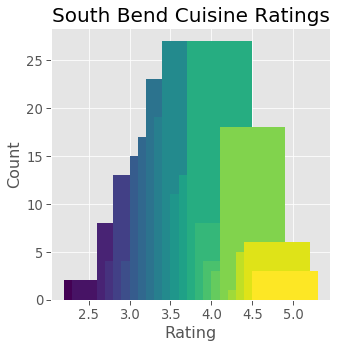

In [711]:
#SOUTH BEND CUISINE RATINGS
sbn_results['rating'] = sbn_results['rating'].astype(float)
rating = sbn_results['rating'].value_counts().sort_index()
plt.figure(figsize = (5, 5))
plt.bar(rating.index, rating.values, color = cm.viridis(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("South Bend Cuisine Ratings", fontsize = 20)

Text(0.5, 1.0, 'Tallahassee Cuisine Ratings')

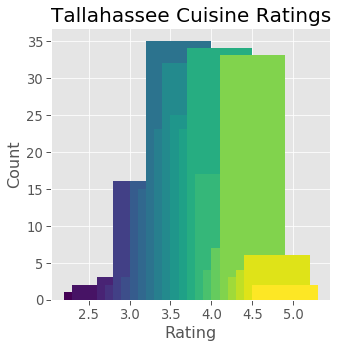

In [710]:
#TALLAHASSEE CUISINE RATINGS
tlh_results['rating'] = tlh_results['rating'].astype(float)
rating = tlh_results['rating'].value_counts().sort_index()
plt.figure(figsize = (5, 5))
plt.bar(rating.index, rating.values, color = cm.viridis(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Tallahassee Cuisine Ratings", fontsize = 20)

#### Cuisine Visualization

In [713]:
from pandas import DataFrame
import matplotlib.pyplot as plt


In [471]:
#SOUTH BEND RANKED RESTAURANT TYPE FREQUENCY
sbn_rating=sbn_cuisine.groupby('rest_type').count()
sbn_rating.sort_values(by='rating', inplace=True, ascending=False)
sbn_rating.head()

,cuisine 1,cuisine 2,cuisine 3,rating
rest_type,,,,
Sandwich Place,15,6,0,15
Pizza Place,14,4,2,14
American Restaurant,13,5,2,13
Burger Joint,10,5,3,10
Fast Food Restaurant,9,6,3,9


In [480]:
#TALLAHASSEE RANKED RESTAURANT TYPE FREQUENCY
tlh_rating=tlh_cuisine.groupby('rest_type').count()
tlh_rating.sort_values(by='rating', inplace=True, ascending=False)
tlh_rating.head()

,cuisine 1,cuisine 2,cuisine 3,rating
rest_type,,,,
Sandwich Place,16,4,0,16
Pizza Place,15,13,1,15
American Restaurant,13,9,6,13
Fast Food Restaurant,11,4,0,11
Burger Joint,10,6,2,10
